In [ ]:
#@title 1) Montando o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title 2) Importando bibliotecas e declarando variáveis

#importando as bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt

# Após baixar os dados do site, crie outra aba, digite "1" copie essa célula, na primeira aba, selecione somente os números (sem as primeiras coluna e linha) e clique com o botão direito
# e depois clique em "Colar Especial" e selecione a opção de "Divisão" na parte de "Operação" 
# Isso tem como objetivo em transformar os dados em números e preencher os espaços vazios com 0

# Em alguns casos o código ainda apresenta uns erros de concatenação de string, 
# ai é necessário trabalhar na base do excel convertendo os tipo GERAL para NUMERICO e ainda fazer ajustes de padrão Americano e Brasileiro de , e .

#Importando a base de dados
DadosP = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/XPE_FCDRV_01_Trabalho_Pratico/Dados/02_Limpo/Basedados.xlsx")

#Declarando as variaveis que iremos utilizar
Ativo = DadosP["TICKER"]
Preco = DadosP["PRECO"]
Liqui = DadosP[" LIQUIDEZ MEDIA DIARIA"]
DY = DadosP["DY"]
PL = DadosP["P/L"]

#Exibindo parte dos dados
print(DadosP.head())

  TICKER  PRECO   DY    P/L   P/VP  P/ATIVOS MARGEM BRUTA MARGEM EBIT  \
0  AALR3  20,51    0 -17.91   2,12        94        30,55       -0,34   
1  ABCB4  17,98  777   5.08   0,78         7        35,76       27,56   
2  ABEV3  13,11  581  14.28   2,48       150        49,29       22,15   
3  ADHM3   1,56    0  -4.09  -1,29     10512       100,00  -13.548,48   
4  AERI3   1,12  185  -9.26   0,97        23        11,93        8,65   

  MARG. LIQUIDA   P/EBIT  ... PATRIMONIO / ATIVOS  PASSIVOS / ATIVOS  \
0        -12,41  -647,85  ...                  45                 54   
1         19,63     3,62  ...                   9                 91   
2         18,14    11,69  ...                  60                 40   
3    -18.860,61    -5,69  ...               -8172               8272   
4         -3,76     4,02  ...                  23                 77   

   GIRO ATIVOS  CAGR RECEITAS 5 ANOS CAGR LUCROS 5 ANOS  \
0           42                   362                  0   
1         

In [ ]:
#@title Atividade 1: Ativo com maior preço

#Armazena em uma varivel p a posiçao do maior valor da coluna de Precos
p = Preco.index[Preco == max(Preco)][0]

#Faz o print do nome do ativo e o valor do ativo
print("Ativo mais caro: " + Ativo[p] + " Preço: R$" + str(max(Preco)) + "\n")

Ativo mais caro: HETA3 Preço: R$96,00



In [ ]:
#@title Atividade 2: Os 10 maiores e menores preços

#Ordena a coluna de Precos na ordem crescente e armazena na variavel PreSort
PreSort=Preco.sort_values()
print("Os 10 maiores Preços: \n")
#Pega os 10 ultimos valores da coluna reorganizada
print(PreSort[-10:])

#Ordena a coluna de Precos na ordem decrescente e armazena na variavel PreSort
PreSort=Preco.sort_values(ascending=False)
print("Os 10 menores Preços: \n")
#Pega os 10 ultimos valores da coluna reorganizada
print(PreSort[-10:])



Os 10 maiores Preços: 

90      9,72
253     9,76
107     9,79
244     9,84
66      9,95
254     9,96
255     9,98
216    90,25
217    90,74
302    96,00
Name: PRECO, dtype: object
Os 10 menores Preços: 

264    0,00
266    0,00
155    0,00
394    0,00
272    0,00
464    0,00
291    0,00
465    0,00
86     0,00
156    0,00
Name: PRECO, dtype: object


In [ ]:
#@title Pré Atividade 3: Vendo os dados da coluna Liquidez media diária

print(Liqui)


0      1.182892e+07
1      2.020549e+07
2      4.662346e+08
3      0.000000e+00
4      1.000621e+07
           ...     
596    5.089420e+06
597    4.400000e+03
598    1.144750e+04
599    4.824071e+07
600    6.066241e+06
Name:  LIQUIDEZ MEDIA DIARIA, Length: 601, dtype: float64


In [ ]:
#@title Ativade 3: Soma e Média da Liquidez Media Diaria

#Soma a Liquidez de todos os ativos e armazena na variavel SLi
SLi=Liqui.sum()
print("Soma da Liquidez: "+ str(SLi) + "\n")
#Calcula a Média da Liquidez de todos os ativos e armazena na variavel MLi
MLi=Liqui.mean()
print("Média da Liquidez: " + str(MLi) + "\n")

Soma da Liquidez: 21684814767.339996

Média da Liquidez: 36081222.57460898



** Melhorando o resultado da Atividade 3

Vamos usar a biblioteca BABEL para formatar os valores em REAL (R$ 000.000,00)

In [ ]:
# Instalando a biblioteca BABEL
!pip install babel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Verificando a versão e detalhes da biblioteca Babel instalada
!pip show babel

Name: Babel
Version: 2.12.1
Summary: Internationalization utilities
Home-page: https://babel.pocoo.org/
Author: Armin Ronacher
Author-email: armin.ronacher@active-4.com
License: BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: Sphinx


In [ ]:
# Testando a instalação da biblioteca BABEL convertendo um numero simples (1234.56)
from babel.numbers import format_currency

valor = 1234.56
print(format_currency(valor, 'BRL', locale='pt_BR'))

R$ 1.234,56


In [ ]:
#Refazendo o código da atividade 3 agora convertendo para REAL a resposta utilizando a biblioteca BABEL
from babel.numbers import format_currency

# Soma a Liquidez de todos os ativos e armazena na variavel SLi
SLi = Liqui.sum()
print("Soma da Liquidez: " + format_currency(SLi, 'BRL', locale='pt_BR') + "\n")

# Calcula a Média da Liquidez de todos os ativos e armazena na variavel MLi
MLi = Liqui.mean()
print("Média da Liquidez: " + format_currency(MLi, 'BRL', locale='pt_BR') + "\n")


Soma da Liquidez: R$ 21.684.814.767,34

Média da Liquidez: R$ 36.081.222,57



In [ ]:
#@title Atividade 4: Ativos com P/L maiores que 0 escrevendo o nome deles

print("Ativos com P/L maiores que 0: \n")
#Percorre todos os dados da coluna de P/L
for valor in PL:
  #Verifica se o PL é maior que 0 
  if valor > 0:
    #Se sim a posicao desse ativo é armazenada na variavel p
    p = PL.index[PL == valor][0]
    #Imprime na tela o nome do Ativo jogando a posição na coluna do TICKER
    print(Ativo[p])
print("\n")

Ativos com P/L maiores que 0: 

ABCB4
ABEV3
AESB3
AFLT3
AGRO3
ALLD3
ALPA3
ALPA4
ALSO3
ALUP11
ALUP3
ALUP4
AMBP3
AMER3
APER3
APTI3
APTI4
ARML3
ARZZ3
ASAI3
ATOM3
AURA33
AURE3
AZEV3
AZEV4
B3SA3
BALM3
BALM4
BAUH4
BAZA3
BBAS3
BBDC3
BBDC4
BBML3
BBSE3
BDLL3
BDLL4
BEEF3
BEES3
BEES4
BGIP3
BGIP4
BLAU3
BMEB3
BMEB4
BMGB4
BMIN3
BMIN4
BMKS3
BMOB3
BNBR3
BOAS3
BOBR4
BPAC11
BPAC3
BPAC5
BPAN4
BPAR3
BPAT33
BPHA3
BRAP3
BRAP4
BRBI11
BRGE11
BRGE12
BRGE3
BRGE5
BRGE6
BRGE7
BRGE8
BRIT3
BRIV3
BRIV4
BRKM3
BRKM5
BRKM6
BRML3
BRSR3
BRSR5
BRSR6
BSEV3
BSLI3
BSLI4
BTTL4
CALI3
CALI4
CAMB3
CAMB4
CAML3
CASN3
CASN4
CATA3
CBAV3
CCRO3
CEAB3
CEBR3
CEBR5
CEBR6
CEEB3
CEEB5
CEEB6
CEED3
CEED4
CEGR3
CEPE3
CEPE5
CEPE6
CESP3
CESP5
CESP6
CGAS3
CGAS5
CGRA3
CGRA4
CIEL3
BEES3
CLSC4
BRKM6
CMIG4
CMIN3
CNSY3
COCE3
COCE5
COCE6
CPFE3
CPLE11
CPLE3
CPLE5
CPLE6
CPRE3
CREM3
CRFB3
CRIV3
CRIV3
CRPG3
CRPG5
CRPG5
CSAB3
CSAB4
CSAN3
CSED3
CSMG3
CSNA3
CSRN3
CSRN5
CSRN6
CSUD3
CURY3
BRKM3
CYRE3
DESK3
DEXP3
DEXP4
DIRR3
DMVF3
DOHL3
DOHL4
DXCO3
EALT3
EALT4


In [ ]:
#@title Atividade 5: Retirando os DY diferentes de 0 e escrevendo o nome deles

print("Retirando os DY diferentes de 0: \n")
#Percorre todos os dados da coluna de DY
for valor in DY:
  #Verifica se ele é diferente de 0
  if valor != 0:
    #Se sim a posicao desse ativo é armazenada na variavel posicao
    p = DY.index[DY == valor][0]
    #Imprime na tela o nome do Ativo jogando a posição na coluna do TICKER
    print(Ativo[p])
print("\n")

Retirando os DY diferentes de 0: 

ABCB4
ABEV3
AERI3
AESB3
AFLT3
AGRO3
AERI3
ALLD3
ALSO3
ALUP11
ALUP3
ALUP11
AMBP3
APER3
ARML3
ARZZ3
ASAI3
ATOM3
AURA33
AURE3
B3SA3
BALM3
BALM4
BAZA3
BBAS3
BBDC3
BBDC4
BBSE3
BEEF3
BEES3
BEES4
BGIP3
BGIP4
BIDI11
BIDI11
BIDI11
BLAU3
BMEB3
BMEB4
BMGB4
BMIN4
BMKS3
BMOB3
BNBR3
BOAS3
BPAC11
BPAC3
BPAC5
BPAN4
BPAR3
BRAP3
BRAP4
BRBI11
BRGE11
BRGE5
BRGE6
BRGE7
BRGE8
BRIT3
BRIV3
BRIV4
BRKM3
BRKM5
BRML3
BRPR3
BRSR3
BRSR5
BRSR6
BSLI3
BSLI4
CALI3
CALI4
CAMB3
CAMB4
CAML3
CASN3
CASN4
CATA3
BOAS3
CBEE3
CCRO3
CEBR3
CEBR5
CEBR6
CEEB3
CEEB5
CEEB6
CEGR3
CEPE3
CEPE5
CEPE6
CGAS3
CGAS5
CGRA3
CGRA4
CIEL3
CLSC3
CLSC4
CMIG3
CMIG4
CMIN3
BPAC11
COCE5
COCE6
CPFE3
CPLE11
CPLE3
CPLE5
CPLE6
CRFB3
BEES3
CRPG3
CRPG5
CRPG5
CSAB3
CSAB4
CSAN3
CSED3
ATOM3
CSNA3
CSRN3
CSRN5
CSRN6
CSUD3
CURY3
CXSE3
CYRE3
DASA3
DESK3
DEXP3
DEXP4
DIRR3
DOHL3
DOHL4
DXCO3
EALT3
EALT4
ECOR3
EEEL3
EEEL4
EGIE3
EKTR3
EKTR4
ELET3
ELET5
ELET6
EMAE3
EMAE4
ENAT3
ENBR3
ENGI11
ENGI3
ENGI4
ENMA3B
ENMA6B
COCE5
ENMT4
EPAR3
EQP

In [ ]:
#@title Atividade 6: Liste as Ações do tipo preferenciais PN (Código 4) e jogue a sáida para um arquivo .txt

caractere = '4'
#Joga na variavel Ativos4 todos os ativos terminados com a número 4
Ativos4 = Ativo[Ativo.str.endswith(caractere)]
#Cria um programa txt com o argumento 'w' que faz com que o programa escreva por cima do que estava escrito no texto
with open('Ativos4.txt', 'w') as arquivo:
  #Usa a função to_String para converter a varivel Ativos4 para String e ser escrita no arquivo .txt 
  arquivo.write(Ativos4.to_string(index=False) + '\n')
#Fecha o arquivo txt para gravar as alteraçoes feitas
arquivo.close
print("Ativos preferenciais (PN) escritos no arquivo texto \n")

Ativos preferenciais (PN) escritos no arquivo texto 



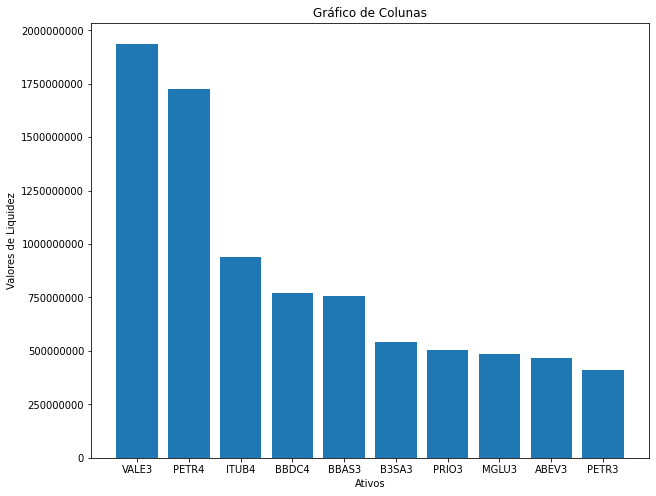

In [ ]:
#@title Atividade 7: Liste as 10 ações com maior Liquidez Media Diaria e mostre o resultado em um gráfico

#Pega as posicoes dos top 10 valores de Liquidez Media Diaria, compara com a posiçao na coluna Ticker 
top10 = DadosP.loc[DadosP[" LIQUIDEZ MEDIA DIARIA"].nlargest(10).index]["TICKER"]
#Tranforma essa variavel top 10 em uma Lista
ListaT = top10.tolist()
#Cria a Variavel ListaL
ListaL = []
#Cria a Variavel de controle i
i=0
#Percorre a ListaT
for x in ListaT:
  #Pega a posição do Ticker e armzena em uma varivel p
  p = Ativo.index[Ativo == x][0]
  #Insere na ListaL o valor da Liquidez do ativo na posição da ListaL i
  ListaL.insert(i,Liqui[p])
  #Soma mais 1 em i
  i+=1
#Define o tamnho do gráfico de 10 polegadas de largura por 8 polegadas de altura
plt.figure(figsize=(10, 8))
#Plota um gráfico de colunas usando as listas ListaT e ListaL, onde ListaT é a lista de ativos e ListaL é a lista de valores de liquidez.
plt.bar(ListaT,ListaL)
#Adiciona rótulos aos eixos x e y do gráfico.
plt.xlabel('Ativos')
plt.ylabel('Valores de Liquidez')
#Adiciona um título ao gráfico.
plt.title('Gráfico de Colunas')
#Define o estilo de formatação dos rótulos dos eixos y para o estilo "plain" (sem notação científica).
plt.ticklabel_format(axis='y', style='plain')
# Mostrar o gráfico
plt.show()
